In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [2]:
import pandas as pd
import scripts.hypotesis_testing as ht
import scripts.csv_utils  as csv
import seaborn as sns
import matplotlib.pyplot as plt

### Load  Dataset

In [3]:
data_path = "../Data/data.csv"
df = csv.load_csv(data_path)
df = ht.calculate_claim_metrics(df)

c:\Users\dagiM\Desktop\Kifiya\Week 3\Insurance Risk Analytics & Predictive Modeling\scripts\csv_utils.py:16: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data loaded successfully from ../Data/data.csv. Shape: (1000098, 52)


In [4]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

### Hypothesis Tests

In [5]:
results = []

# H₀: No risk difference across provinces
provinces = df['Province'].dropna().unique()
for i in range(len(provinces)):
    for j in range(i+1, len(provinces)):
        result = ht.test_difference_between_groups(df, "Province", "LossRatio", provinces[i], provinces[j])
        results.append(result)

# H₀: No risk difference between zip codes
zipcodes = df['PostalCode'].dropna().unique()[:5]  # Sample only a few to reduce combinations
for i in range(len(zipcodes)):
    for j in range(i+1, len(zipcodes)):
        result = ht.test_difference_between_groups(df, "PostalCode", "LossRatio", zipcodes[i], zipcodes[j])
        results.append(result)

# H₀: No margin difference between zip codes
for i in range(len(zipcodes)):
    for j in range(i+1, len(zipcodes)):
        result = ht.test_difference_between_groups(df, "PostalCode", "Margin", zipcodes[i], zipcodes[j])
        results.append(result)

# H₀: No risk difference between Women and Men
result = ht.test_difference_between_groups(df, "Gender", "LossRatio", "Male", "Female")
results.append(result)

### Display Results

In [6]:
results_df = pd.DataFrame(results)
results_df[results_df["significant"] == True]

,group_a,group_b,metric,t_stat,p_value,significant
53,1619,1625,Margin,-2.291931,0.022004,True


The p-value = 0.022 is below the standard significance threshold of 0.05. Therefore, we reject the null hypothesis that the average margin (TotalPremium - TotalClaims) is equal for zip codes 1619 and 1625.

The negative t-statistic (-2.29) indicates that zip code 1619 has a significantly lower average margin than zip code 1625.

This suggests that policies issued in zip code 1619 are less profitable compared to those in 1625.

C:\Users\dagiM\AppData\Local\Temp\ipykernel_21216\1044701958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_margin, x='PostalCode', y='Margin', palette='Set2')


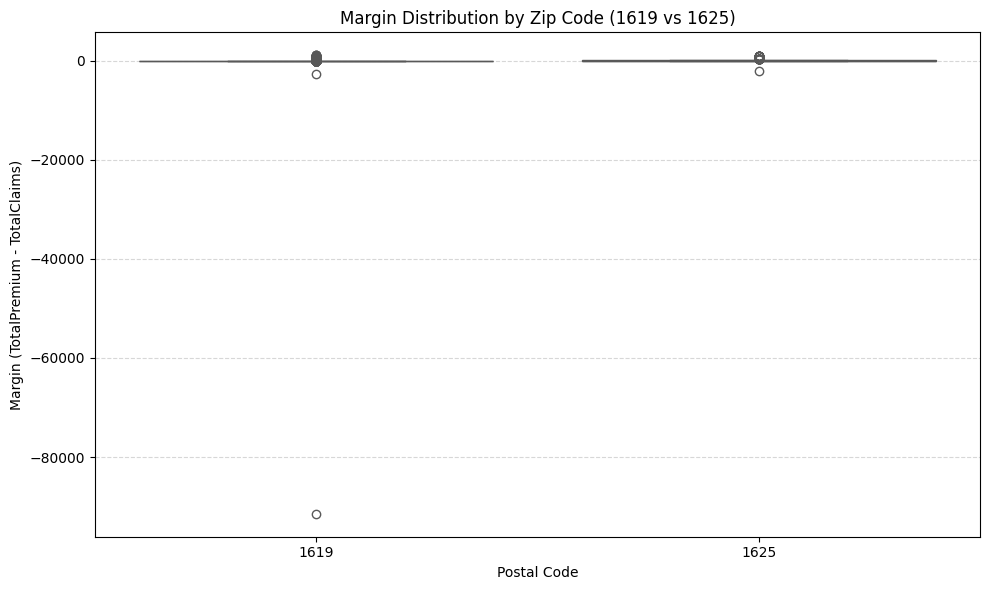

In [7]:
df_margin = df[df['PostalCode'].isin([1619, 1625])]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_margin, x='PostalCode', y='Margin', palette='Set2')

plt.title("Margin Distribution by Zip Code (1619 vs 1625)")
plt.xlabel("Postal Code")
plt.ylabel("Margin (TotalPremium - TotalClaims)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()